# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Loading Dataset

In [ ]:
# Using pandas 'read_csv' function to read the csv file
df = pd.read_csv('Advertising Budget and Sales.csv')
df.head(10)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [ ]:
df.isnull().sum() # Using is nul

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [ ]:
# The above information shows that the dataset has not a null values.

# Exploring Duplicates:

In [ ]:
# Using duplicated function to explore the duplicate entries and
#it is showing that the dataset has not any duplicate entries
df.duplicated().sum()

0

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True) # removing Unnamed column that showing the row id no.

# Exploring Statistical Information:

In [ ]:
df.describe().T # Using describe function to understand statistics of dataset

,count,mean,std,min,25%,50%,75%,max
TV Ad Budget ($),200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio Ad Budget ($),200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper Ad Budget ($),200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales ($),200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
numerical_df = df.select_dtypes(include=['int', 'float']) # Extracting categorical columns for label encoding
numerical_columns = numerical_df.columns

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Calculate mean, median, standard deviation, skewness, and kurtosis for each numeric column
statistics = {
    'Mean': numerical_df.mean(),
    'Median': numerical_df.median(),
    'Standard Deviation': numerical_df.std(),
    'Skewness': numerical_df.apply(skew),
    'Kurtosis': numerical_df.apply(kurtosis)
}

# Convert statistics to a DataFrame for plotting
statistics_df = pd.DataFrame(statistics)
statistics_df

,Mean,Median,Standard Deviation,Skewness,Kurtosis
TV Ad Budget ($),147.0425,149.75,85.854236,-0.069328,-1.225897
Radio Ad Budget ($),23.2640,22.90,14.846809,0.093467,-1.258962
Newspaper Ad Budget ($),30.5540,25.75,21.778621,0.887996,0.603527
Sales ($),14.0225,12.90,5.217457,0.404508,-0.428570


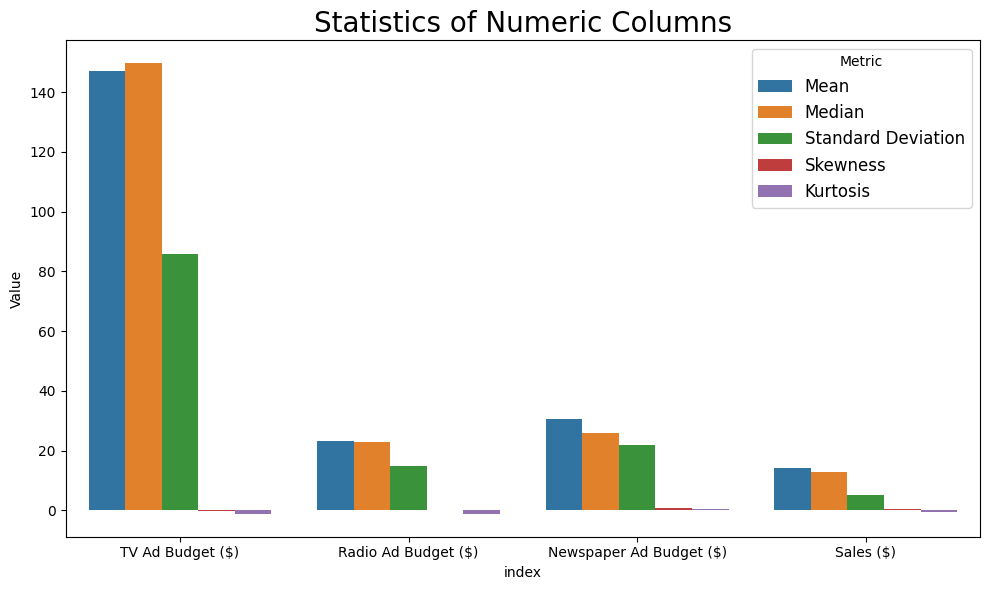

In [ ]:
# Reset index to turn the index into a column
statistics_df.reset_index(inplace=True)

# Melt the DataFrame
melted_df = statistics_df.melt(id_vars='index', var_name='Statistic', value_name='Value')

# Plot the statistics
plt.figure(figsize=(10, 6))

sns.barplot(x='index', y='Value', hue='Statistic', data=melted_df)
plt.title('Statistics of Numeric Columns', fontsize = 20)
plt.xticks()
plt.legend(title='Metric', fontsize=12)
plt.tight_layout()
plt.show()

# Visualization:

In [ ]:
# scatter plot
def scatter_plot(x_axis, y_axis, dataframe, title):
  '''Function for scatter plot, takes x, y and dataset'''
  plt.figure(figsize = (6, 4))
  sns.scatterplot(x = x_axis, y = y_axis, data = dataframe)
  plt.title(title, fontsize=16)
  plt.xlabel(x_axis, fontsize=16)
  plt.ylabel(y_axis, fontsize=16)
  plt.xticks()
  plt.grid(True)
  plt.show()

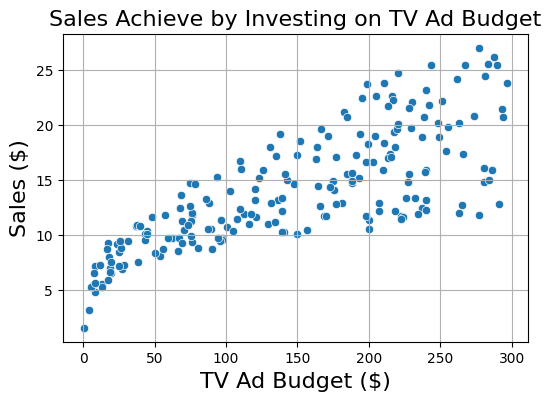

In [ ]:
scatter_plot('TV Ad Budget ($)', 'Sales ($)', df, "Sales Achieve by Investing on TV Ad Budget")

In [ ]:
# hist plot
def hist_plot(x_axis, dataframe, title):
  '''Function for box plot, takes x, y and dataset'''
  plt.figure(figsize = (6, 4))
  sns.histplot(x = x_axis,  data = dataframe)
  plt.title(title, fontsize=18)
  plt.xlabel(x_axis, fontsize=16)
  plt.xticks()
  plt.grid(True)
  plt.show()

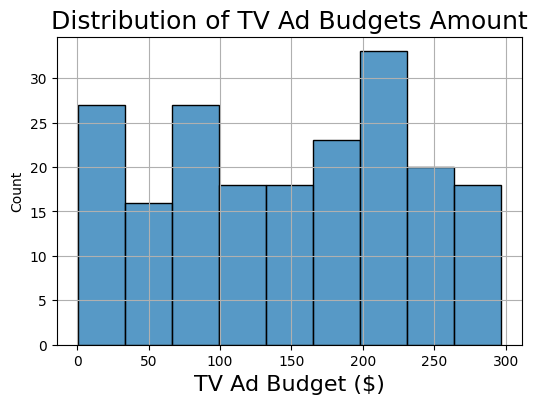

In [ ]:
hist_plot('TV Ad Budget ($)', df, 'Distribution of TV Ad Budgets Amount')

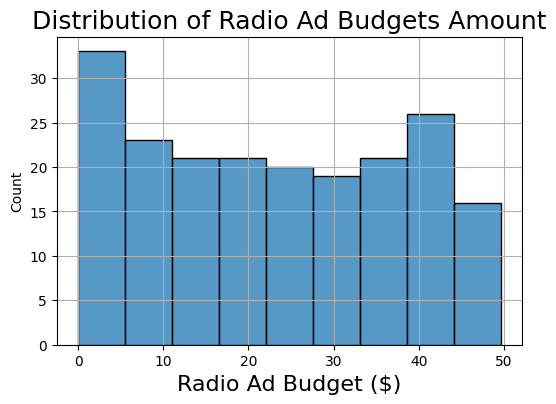

In [ ]:
hist_plot('Radio Ad Budget ($)', df, 'Distribution of Radio Ad Budgets Amount')

In [ ]:
# bar_plot
def bar_plot(values, x_axis, y_axis, title, font_size=12 ):
  ''' function take x and y axis values and will plot a bar plot'''
  values.plot(kind = 'bar', x = x_axis, y = values.values, fontsize = font_size)
  plt.title(title, fontsize=25)
  plt.xticks()
  plt.grid(True)
  plt.show()

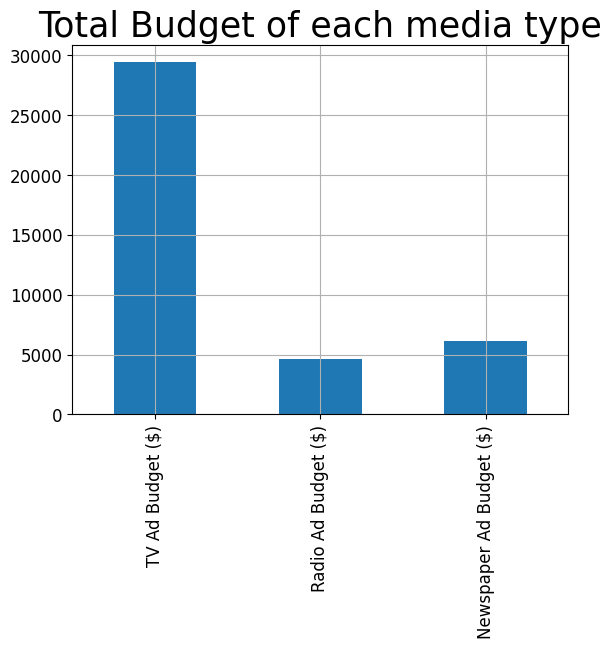

In [ ]:
total_budget = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']].sum()
bar_plot(total_budget, ['TV', 'Radio', 'Newspaper'], df, 'Total Budget of each media type')

# Correlation:

In [ ]:
def corr_plot(dataframe):
  ''' Function that takes dataframe and will return a heatmap plot'''
  correlation_matrix = dataframe.corr()
  # Plotting heatmap for viualising correlation
  plt.figure(figsize=(4, 4))
  sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.09)
  plt.title('Correlation Heatmap', fontsize=25)
  plt.show()
  plt.savefig('correlation heatmap')

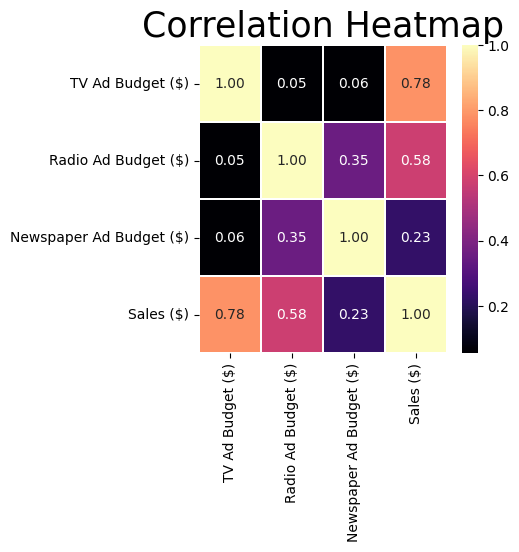

<Figure size 640x480 with 0 Axes>

In [ ]:
corr_plot(df)

In [ ]:
df.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [ ]:
features = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)', 'Sales ($)']]

# Scaling:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)
df_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

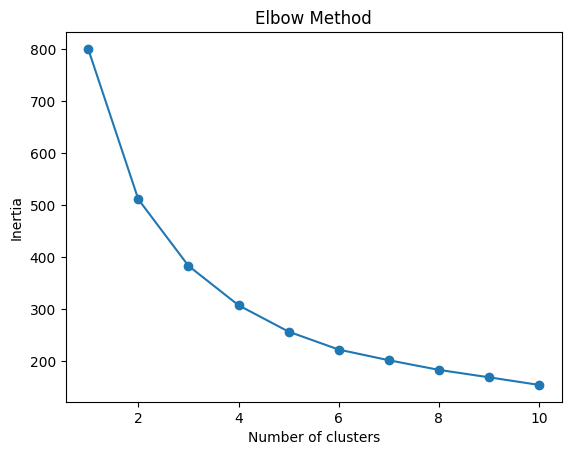

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store inertia values for different number of clusters
inertia_values = []

# Loop through different values of k
for k in range(1, 11):
    # Initialize KMeans with current value of k
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)

    # Fit KMeans to the scaled data
    kmeans.fit(df_scaled)  # Using df_scaled is  scaled data

    # Append the inertia value (sum of squared distances of samples to their closest cluster center)
    inertia_values.append(kmeans.inertia_)
def elbow_method():
  # Plotting the Elbow Method graph
  plt.plot(range(1, 11), inertia_values, marker='o')
  plt.title('Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.show()
elbow_method()

In [ ]:
def cluster_plot(k):
    ''' Function that take K (clusters) value and will plot a graph of clusters'''
    kmeans = KMeans(n_clusters=k, init='k-means++',max_iter=500, n_init=10, random_state=0)
    y_kmeans = kmeans.fit_predict(df_scaled)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
    plt.title('K-means clustering (k={})'.format(k))
    plt.legend()
    plt.show()

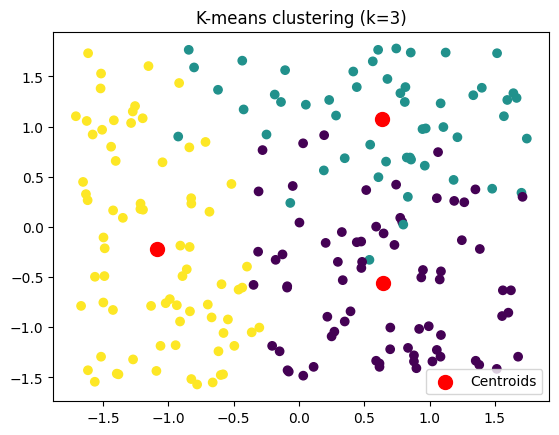

In [ ]:
cluster_plot(3)

# Linear Regression with sklearn:

# Line Fitting:

# Predicting Sales by TV Ad Budget:

In [ ]:
X_feature = df[['TV Ad Budget ($)']]
y_feature = df[['Sales ($)']]

In [ ]:
x = scaler.fit_transform(X_feature)
y = scaler.fit_transform(y_feature)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

 #Independent variable
XY = pd.DataFrame(x)
# Dependent variable
Z = y
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(XY, Z, test_size=0.2, random_state=42)
# Perform multiple linear regression
mlr = LinearRegression()
# Fit the model
mlr.fit(X_train, y_train)

# Predict on test data
y_pred = mlr.predict(X_test)

print(mlr.coef_)

# Get the coefficients
β1 = mlr.coef_[0][0]
# Get the intercept
α = mlr.intercept_

print(α)

[[0.76565558]]
[-0.0117234]


In [ ]:
from scipy import stats as st
# Re-format the results of the linear regression
params = np.append(mlr.coef_, mlr.intercept_)
# Use the model to predict other output values
predictions = mlr.predict(X_test)
# Sum of squared residuals
sum_sq_residuals = sum((y_test - predictions)**2)
# Degrees of freedom (sample size - number of parameters)
dof = len(y_train) - len(params)
# Mean squared error
mse = sum_sq_residuals / dof
# Add a constant
X_train['Constant'] = 1
# Covariances of the parameters ('@'' is the dot product)
cov = mse * np.diagonal(np.linalg.inv(X_train.T @ X_train))
# Standard errors of the parameters
se = np.sqrt(cov)
# t-statistics associated with the parameters
t_statistics = params / se
# Two-tailed test
tails = 2
# Calculate the p-values
p_values = [tails * (1 - st.t.cdf(np.abs(t), dof)) for t in t_statistics]
# Significance level
alpha = 0.05
# Percent-point function (aka quantile function) of the t-distribution
t = st.t.ppf(1 - (alpha / tails), dof)
# Margin of error
d = t * se
# 95% confidence interval
upper_ci = params + d
lower_ci = params - d

In [ ]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)

# Display the results
output = [params, se, t_statistics, np.array(p_values), lower_ci, upper_ci]
index = ['Value', 'Standard Error', 't-Statistic', 'p-Value', 'Lower CI', 'Upper CI']
output = pd.DataFrame(output, index=index, columns=list(X_train)).round(3)
output = output.T
print(output)

          Value  Standard Error  t-Statistic  p-Value  Lower CI  Upper CI
0         0.766           0.025       30.815    0.000     0.717     0.815
Constant -0.012           0.024       -0.480    0.632    -0.060     0.037


# Confidence Interval Plot Using Seaborn library:

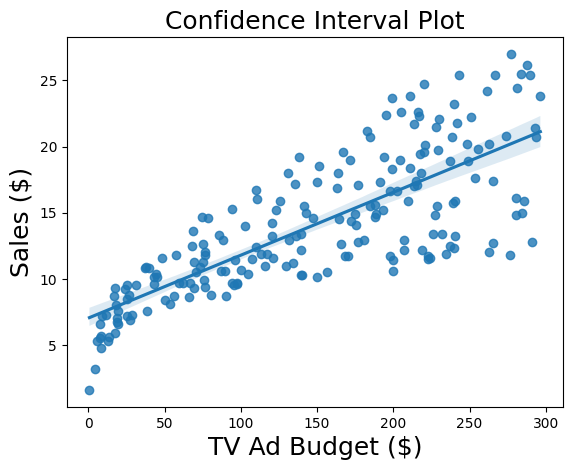

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plot regplot using seaborn
sns.regplot(x='TV Ad Budget ($)', y='Sales ($)', data=df)
plt.title('Confidence Interval Plot', fontsize=18)
plt.xlabel('TV Ad Budget ($)', fontsize=18)
plt.ylabel('Sales ($)', fontsize=18)
plt.show()

R-squared: 0.68


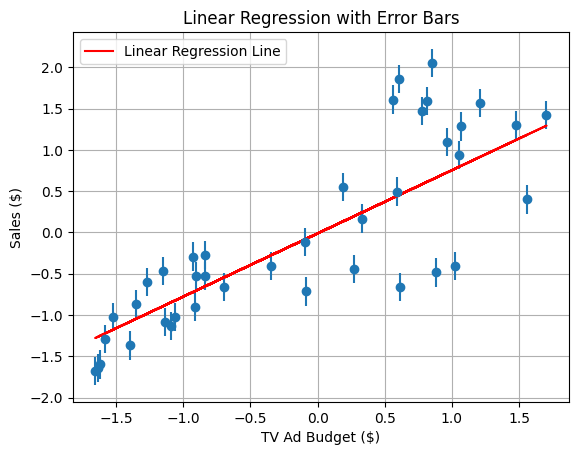

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate confidence interval
confidence = 0.95
squared_errors = (y_pred - y_test) ** 2
mse = np.mean(squared_errors)
std_dev = np.std(squared_errors)
margin_of_error = 1.96 * (std_dev / np.sqrt(len(y_pred)))
confidence_interval = (mse - margin_of_error, mse + margin_of_error)
# Generate random indices to select 20 values
random_indices = np.random.choice(np.arange(3000), size=20, replace=False)
# Plot data points with error bars

plt.errorbar(X_test.flatten(), y_test.flatten(), yerr=margin_of_error, fmt='o', )

# Plot linear regression line
plt.plot(X_test, y_pred, color='red', label='Linear Regression Line')

# # Calculate and display R-squared value
r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared:.2f}')

plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.title('Linear Regression with Error Bars')
plt.legend()
plt.grid(True)
plt.show()
